# Practical 7. Assignment 3.

Due date is March 7, before the class. You can work with a partner

Partner: Mohamed Salama, utorid: salamam5

## Problem 1. Your first MD simulation.

Read through section 6 and example 6.1-6.2 of the lecture. Run 3 simulations of fully extended polyglycine `data/polyGLY.pdb` for 1 nanosecond in vacuum (no water) with $T_1=100 K$, $T_2=300 K$, and $T_3=500 K$ and visually compare how extended the final structure is at each temperature. Write down your observations.  

In [37]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
import MDAnalysis as md
import nglview as ng
from sys import stdout

In [90]:

pdb0_file = 'data/polyGLY.pdb'
file0 = open(pdb0_file, 'r')
for line in file0:
    print(line)

REMARK   1 CREATED WITH OPENMM 7.3, 2019-02-21

ATOM      1  N   GLY A   1     -36.753 -23.815  -2.134  1.00  0.00           N  

ATOM      2  H   GLY A   1     -37.106 -24.760  -2.199  1.00  0.00           H  

ATOM      3  H2  GLY A   1     -37.083 -23.276  -2.926  1.00  0.00           H  

ATOM      4  H3  GLY A   1     -37.100 -23.382  -1.289  1.00  0.00           H  

ATOM      5  CA  GLY A   1     -35.304 -23.815  -2.134  1.00  0.00           C  

ATOM      6  HA2 GLY A   1     -34.929 -24.337  -1.254  1.00  0.00           H  

ATOM      7  HA3 GLY A   1     -34.936 -24.310  -3.033  1.00  0.00           H  

ATOM      8  C   GLY A   1     -34.781 -22.386  -2.134  1.00  0.00           C  

ATOM      9  O   GLY A   1     -35.271 -21.544  -2.883  1.00  0.00           O  

ATOM     10  N   GLY A   2     -33.783 -22.114  -1.290  1.00  0.00           N  

ATOM     11  H   GLY A   2     -33.353 -22.837  -0.727  1.00  0.00           H  

ATOM     12  CA  GLY A   2     -33.198 -20.792  -1

In [91]:
u = md.Universe(pdb0_file)
ng.show_mdanalysis(u, gui=True)

NGLWidget()

In [10]:
def simulate(temp, fname):
    '''run simulation on polyclicine for 1 nanosecond in vacuum (no water) with given temperature 
        and save file as fname
    '''
    ### 1.loading initial coordinates
    pdb = PDBFile(pdb0_file) 

    ### 2.choosing a forcefield parameters
    ff = ForceField('amber10.xml')  
    system = ff.createSystem(pdb.topology, nonbondedMethod=CutoffNonPeriodic)

    ### 3. Choose parameters of the experiment: temperature, pressure, box size, solvation, boundary conditions, etc
    temperature = temp*kelvin
    frictionCoeff = 1/picosecond
    time_step = 0.002*picoseconds
    total_steps = 1*nanosecond / time_step

    ### 4. Choose an algorithm (integrator)
    integrator = LangevinIntegrator(temperature, frictionCoeff, time_step)

    ### 5. Run simulation, saving coordinates time to time:

    ### 5a. Create a simulation object
    simulation = Simulation(pdb.topology, system, integrator)
    simulation.context.setPositions(pdb.positions)

    ### 5b. Minimize energy
    simulation.minimizeEnergy()

    ### 5c. Save coordinates to dcd file and energues to standard output console:
    simulation.reporters.append(DCDReporter(fname, 1000))
    simulation.reporters.append(StateDataReporter(stdout, 5000, step=True, potentialEnergy=True,\
                                                  temperature=True, progress=True, totalSteps = total_steps))

    ### 5d. Run!
    simulation.step(total_steps)

In [84]:
simulate(500, 'data/polyALA_traj_500K.dcd')

#"Progress (%)","Step","Potential Energy (kJ/mole)","Temperature (K)"
1.0%,5000,4358.179036461908,465.9763990211766
2.0%,10000,4223.854060479385,460.21714901283576
3.0%,15000,3937.024067835952,503.65865659278165
4.0%,20000,4004.0270952850406,500.8458505699277
5.0%,25000,3979.447671496886,499.2825611151692
6.0%,30000,3936.289657817283,478.5124483993892
7.0%,35000,3832.0169658056275,495.9921348506074
8.0%,40000,3756.009188375303,540.937934134266
9.0%,45000,3726.2788741035924,518.4407199855714
10.0%,50000,3783.21985384484,500.34548598427443
11.0%,55000,3661.0862028134698,475.3461776897141
12.0%,60000,3648.568707072175,442.87225568498775
13.0%,65000,3638.6090519262675,533.3492961206547
14.0%,70000,3631.8645348743235,493.04391591101626
15.0%,75000,3587.0681585021143,497.8558203785094
16.0%,80000,3574.183732052921,522.1573193768791
17.0%,85000,3540.210540930802,497.4522968908587
18.0%,90000,3585.9377165117335,536.036697997991
19.0%,95000,3526.8276593771548,471.99082832899165
20.0%,100000,362

TypeError: in method 'LangevinIntegrator_step', argument 2 of type 'int'

In [75]:
### 6. Visualization
sys = md.Universe(pdb0_file, 'data/polyALA_traj_100K.dcd')
ng.show_mdanalysis(sys, gui=True)

NGLWidget(count=500)

In [83]:
### 6. Visualization
sys = md.Universe(pdb0_file, 'data/polyALA_traj_300K.dcd')
ng.show_mdanalysis(sys, gui=True)

NGLWidget(count=500)

In [85]:
### 6. Visualization
sys = md.Universe(pdb0_file, 'data/polyALA_traj_500K.dcd')
ng.show_mdanalysis(sys, gui=True)

NGLWidget(count=500)

# At the lowest temperature (100 K) the protein was much more extended after 1 ns compared to the other two temperatures (there was very little folding at 100 K). At 300 K and 500 K the protein folded much more, and apeared to be about equally compact after 1 ns for both temperatures

## Problem 2. MD simulation analysis.

Perform a quantitative analysis of how extended/collapsed the proteins are in the trajectories obtained from Problem 1. Use, for example, end-to-end distance and/or the function `radius_of_gyration()` from the `MDAnalysis` module, which returns the [radius of gyration](https://en.wikipedia.org/wiki/Radius_of_gyration) of the protein. Present your findings and explain your observations from the physical perspective. 

**Hint**. Think about the entropical and energetical contributions to the collapse and how temperature plays role in these processes. 

In [86]:
import numpy as np
import matplotlib.pyplot as plt
def end2end(sys):
    
    ### analysis of end-to-end distance

    ## choose terminal atoms 
    N_terminus = sys.select_atoms('resid 1 and name N')
    C_terminus = sys.select_atoms('resid 25 and name C')

    ## go through the whole trajectory and compute distance between them dor every frame
    dist = []
    for frame in sys.trajectory:
        dist.append(np.linalg.norm(N_terminus.positions - C_terminus.positions))

    ## the result is in the dist array    
    dist = np.array(dist) 
    
    return dist


## Plotting end to end distance for each temperature

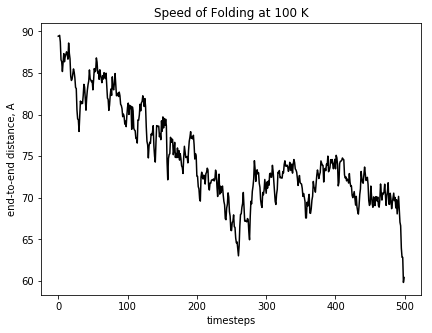

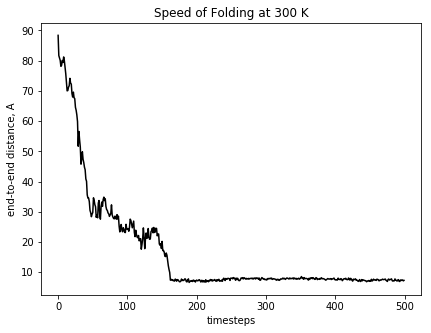

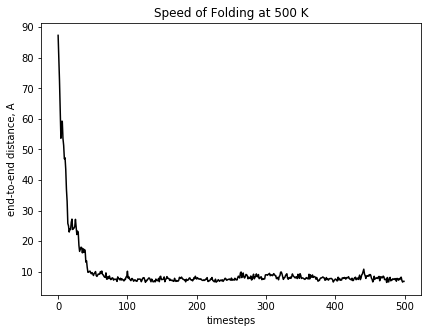

Final end to end distance at 100 K:
60.40691
Final end to end distance at 300 K:
7.286388
Final end to end distance at 500 K:
6.8530245


In [87]:
sys1 = md.Universe(pdb0_file, 'data/polyALA_traj_100K.dcd')
sys2 = md.Universe(pdb0_file, 'data/polyALA_traj_300K.dcd')
sys3 = md.Universe(pdb0_file, 'data/polyALA_traj_500K.dcd')


plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot( end2end(sys1), '-k' )
plt.xlabel('timesteps')
plt.ylabel('end-to-end distance, A')
plt.title("Speed of Folding at 100 K")
plt.show()


plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot( end2end(sys2), '-k' )
plt.xlabel('timesteps')
plt.ylabel('end-to-end distance, A')
plt.title("Speed of Folding at 300 K")

plt.show()


plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot( end2end(sys3), '-k' )
plt.xlabel('timesteps')
plt.ylabel('end-to-end distance, A')
plt.title("Speed of Folding at 500 K")

plt.show()


print("Final end to end distance at 100 K:")
print(end2end(sys1)[-1])
print("Final end to end distance at 300 K:")
print(end2end(sys2)[-1])
print("Final end to end distance at 500 K:")
print(end2end(sys3)[-1])

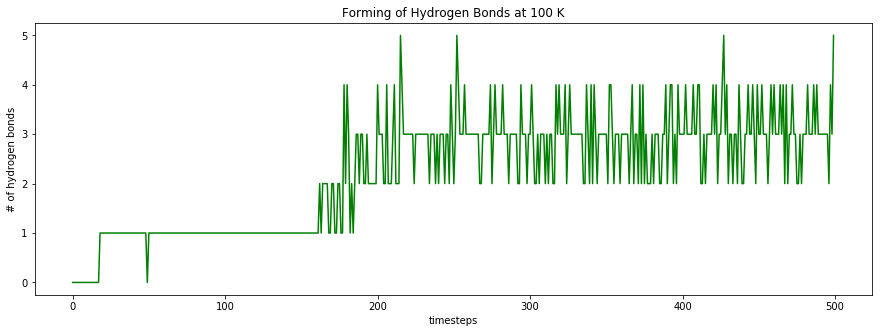

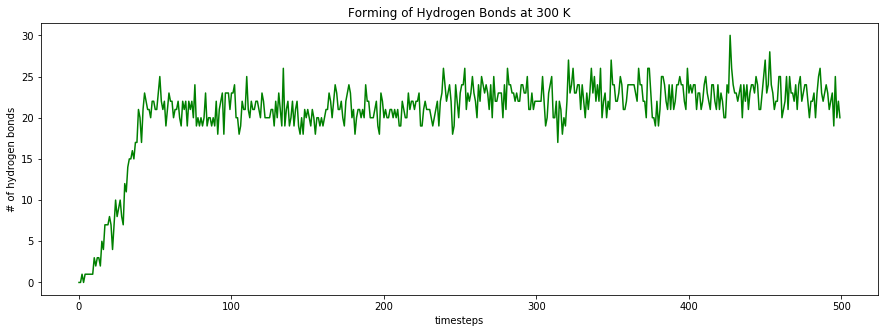

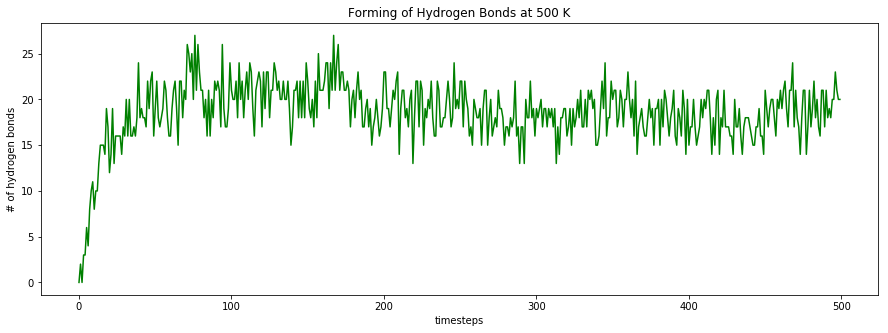

In [88]:
from MDAnalysis.analysis import hbonds ## module for analysis of hydrogen bonds

## compute information about hbonds and write it in the 'hb.timeseries'


def plot(num):   
    ## go through the 'hb.timeseries' file and calculate number of bonds for each time frame (it's the length of array frame)
    hb_number = []
    hb = hbonds.hbond_analysis.HydrogenBondAnalysis(num)
    hb.run()

    for frame in hb.timeseries:
        hb_number.append(len(frame))

    ## the result is in the number array     
    hb_number = np.array(hb_number)

    plt.figure(figsize=(15,5))

    plt.plot(hb_number, 'g-')
    plt.ylabel('# of hydrogen bonds')
    plt.xlabel('timesteps')

    
plot(sys1)
plt.title("Forming of Hydrogen Bonds at 100 K")
plt.show()
plot(sys2)
plt.title("Forming of Hydrogen Bonds at 300 K")
plt.show()
plot(sys3)
plt.title("Forming of Hydrogen Bonds at 500 K")
plt.show()

In [89]:
# Radii of Gyration
print("Radius of gyration after 1 ns, at 100 K:")
print(sys1.atoms.radius_of_gyration())
print("\nRadius of gyration after 1 ns, at 300 K:")
print(sys2.atoms.radius_of_gyration())
print("\nRadius of gyration after 1 ns, at 500 K:")
print(sys3.atoms.radius_of_gyration())


Radius of gyration after 1 ns, at 100 K:
26.693876665403366

Radius of gyration after 1 ns, at 300 K:
26.429826670152487

Radius of gyration after 1 ns, at 500 K:
26.01812597165474


As shown by the first set of plots, the speed of folding (considering end to end distances) increases at higher temperatures, and the final radius of gyration is also inversely proportional to the temperature, suggesting that the protein folds faster, and reaches a more compact state at higher temperatures.
 
At 100K there may be too little kinetic energy for the protein to fold. At 300 K, the protein can perhaps  move more due to the higher kinetic energy, but at 500 K, the kinetic energy is maybe so high that the hydrogen bonds break more freely (which is why the final number of hydrogen bonds seems to be higher at 300 K than at 500 K).

Perhaps the fewer number of hydrogen bonds at 500 K allows the protein to be more flexible and thus reach its most compact state. (ie. at this temperature, the molecule has the most kinetic energy, so it can move around more and try more configurations until the most energetically favourable configuration is reached - it will not get stuck in any local minima that perhaps the 300 K simulation was stuck at because it has enough energy to break out of those configurations).